#Аудиториска вежба 7: Boosting Techniques

Boosting is an ensemble method, a way of combining predictions from several models into one. It does that by taking each predictor sequentially and modelling it based on its predecessor’s error (giving more weight to predictors that perform better):
1. Fit a first model using the original data
2. Fit a second model using the residuals of the first model
3. Create a third model using the sum of models 1 and 2

## <font color='pink'>XGBoost<font>

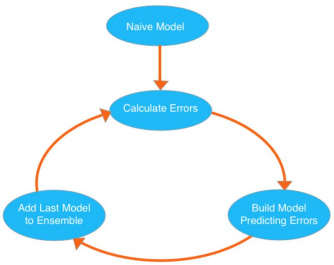

XGBoost is an extreme gradient boosting algorithm.
It is a supervised learning algorithm that can be used for regression or classification tasks.

XGBoost performs quite well for structured, tabular data. For non-structued data, neural networks are usually a better choice.

Gradient boosting is a specific type of boosting, named like this because it minimises the loss function using a gradient descent algorithm.

Gradient descent is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning and deep learning to minimise a cost/loss function.

XGBoost splits up to the specified max_depth and then starts pruning the tree backwards. XGBoost is comparatively faster than other ensemble classifiers. The core algorithm can be parallelized. 
XGBoost can not handle categorical features, it only accepts numerical values.


### <font color='red'>Coding Example<font>

#### <font color='white'>Classification<font>

In [ ]:
#Resource: https://www.kaggle.com/raghupalem/bill_authentication
!gdown 1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j

Downloading...
From: https://drive.google.com/uc?id=1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j
To: /content/bill_authentication.csv
100% 46.4k/46.4k [00:00<00:00, 48.1MB/s]


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('bill_authentication.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


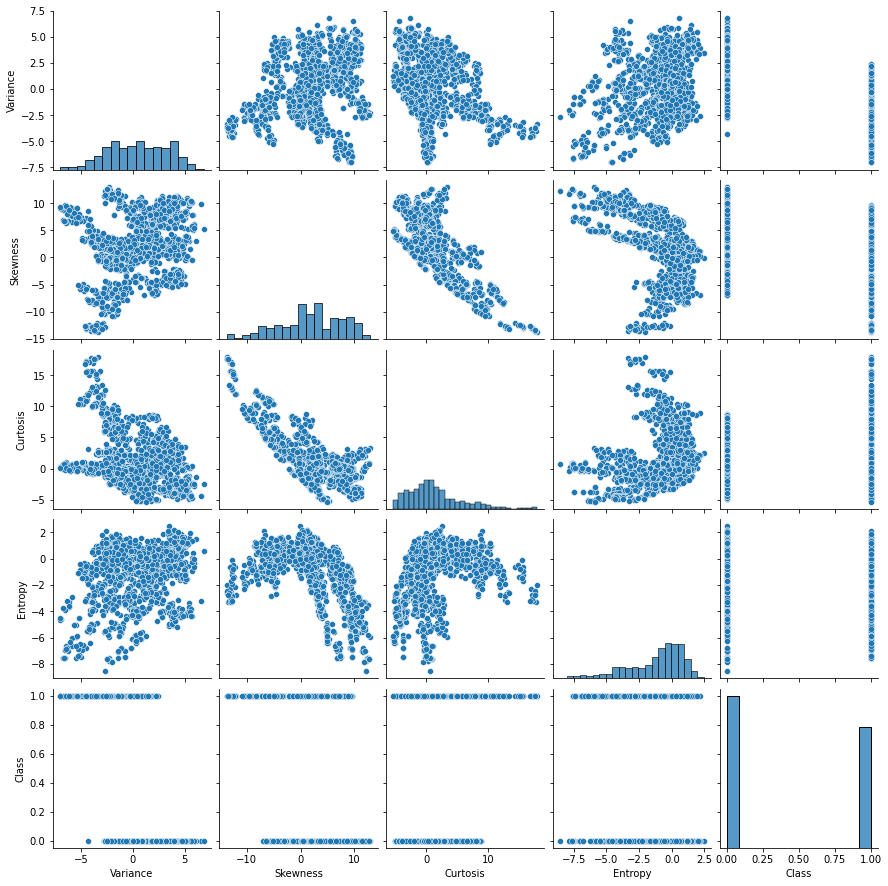

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [ ]:
#Note: max_depth is the maximum tree depth
#Note: min_child_weight represents a threshold that stops the splitting once the sample size in a node reaches it
#Note: n_estimators is the number of runs
#Note: n_jobs is the number of threads running in parallel
#Note: verbose is set to print evaluation scores in the appropriate steps
#Note: learning_rate is the learning speed
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9963636363636363


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[161   1]
 [  0 113]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       162
           1       0.99      1.00      1.00       113

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### <font color='white'>Regression<font>

In [ ]:
#Resource: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
!gdown 1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H

Downloading...
From: https://drive.google.com/uc?id=1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H
To: /content/train.csv
100% 461k/461k [00:00<00:00, 103MB/s]


In [ ]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
#Note: colsample_bytree is subsample ratio of columns when constructing each tree
#Note: alpha can help reduce model complexity and enhance performance
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

[17:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Note: MAE tells us how big of an error we can expect from the forecast on average. 
#Note: A good MAE is relative to the specific dataset. 
#Note: MSE is the average squared error between actual and predicted values. The closer to 0 the better.
#Note: RMSE is the standard deviation of the residuals (prediction errors).
#Note: Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. 
#Note: In other words, it tells you how concentrated the data is around the line of best fit.
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))

Mean Absolute Error : 63316.63618364726
Mean Squared Error : 5696011534.442991
Root Mean Squared Error : 75471.92547194613


In [ ]:
#Note: We can pass the data as a DMatrix and use Cross Validation.
from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data=X, label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5,'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3, 
                num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

[17:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,179033.968750,650.675751,179071.536458,1558.739525
1,162358.500000,623.335527,162872.739583,1440.274536
2,147449.661458,717.930424,148259.156250,812.789874
3,133987.661458,590.026949,135161.968750,730.897987
4,121795.273437,463.116471,123460.062500,766.995133


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    30368.595703
Name: test-rmse-mean, dtype: float64


In [ ]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


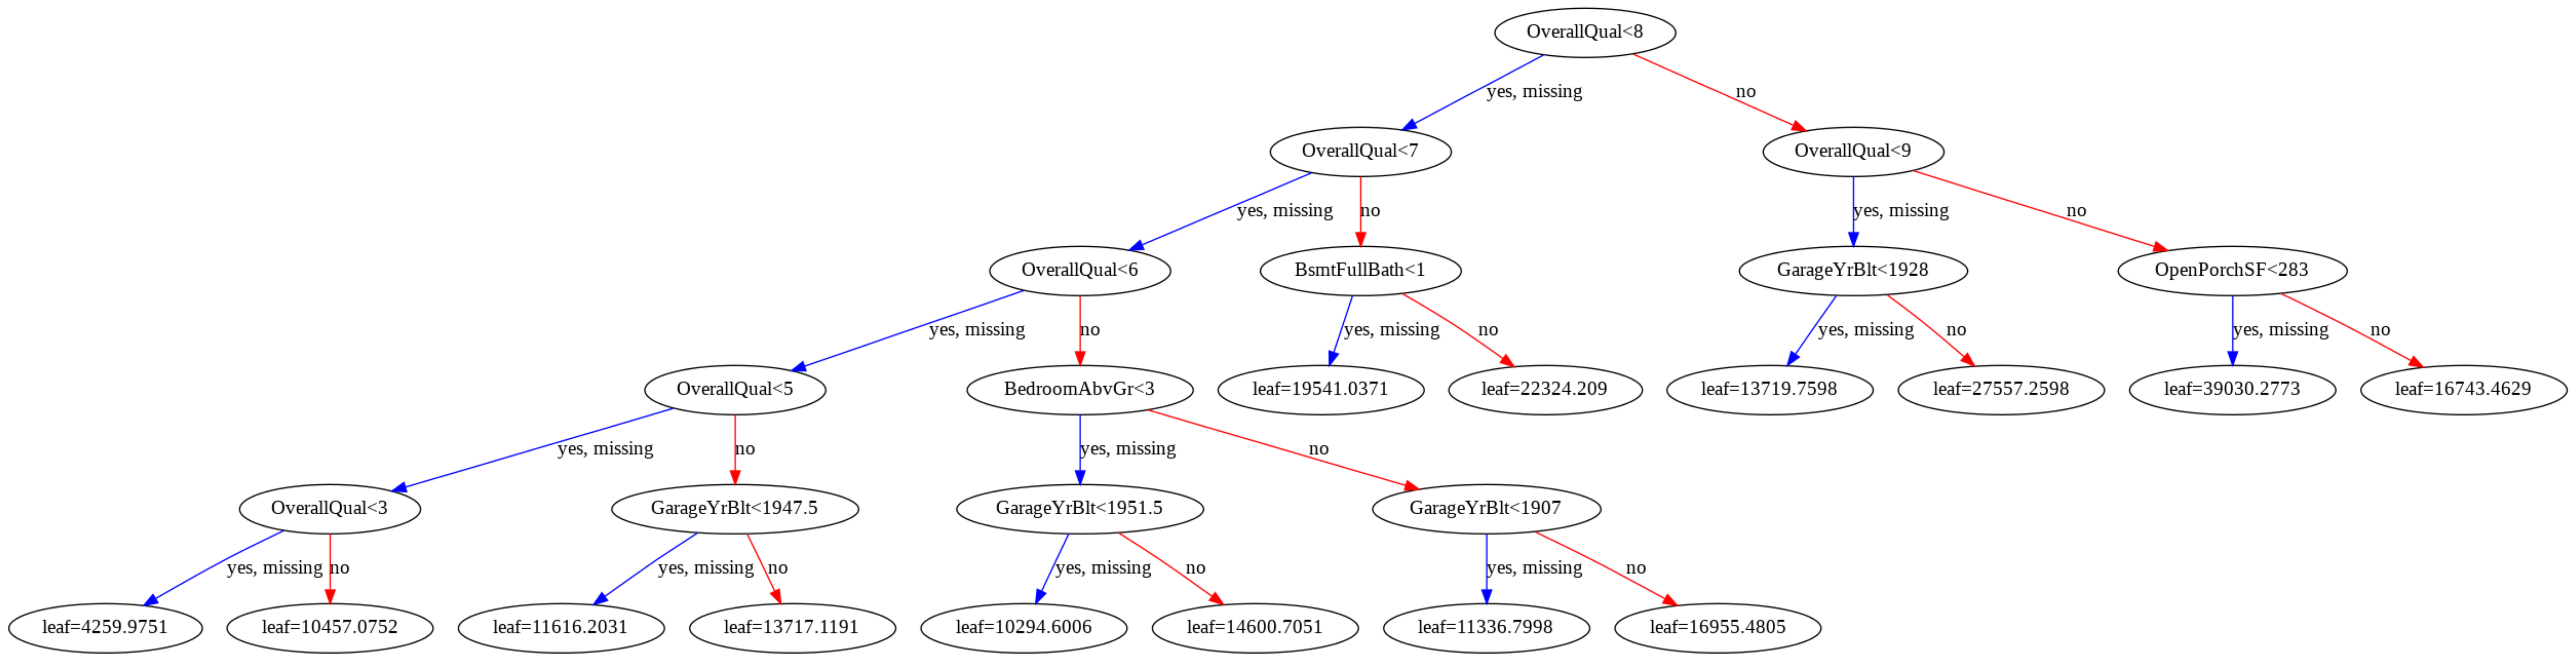

In [ ]:
#Note: Visualization of Boosting trees and Feature importance.
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [1000, 1000]
plt.show()

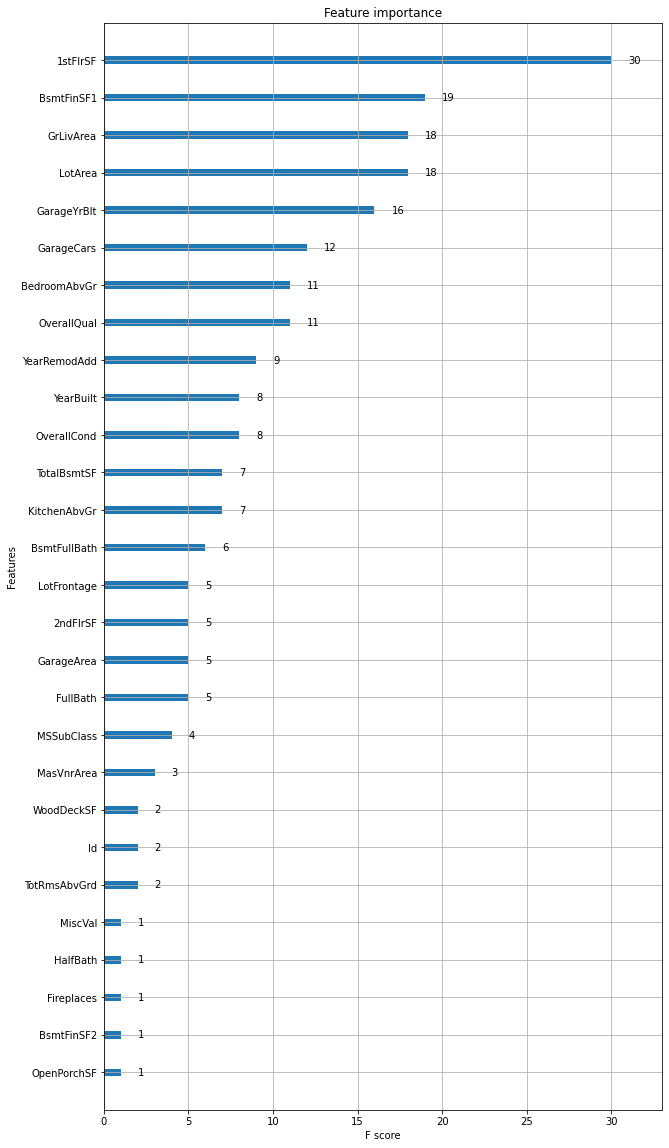

In [ ]:
#Note: We can also use Explainable ML for this purpose, ex. SHAP model.
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(xg_reg, ax=ax)
plt.show()

## <font color='orange'>LGBM<font>

LightGBM is a gradient-based one-side sampling algorithm that uses leaf-wise (best-first) tree growth.
LightGBM can handle categorical features by taking the input of feature names.


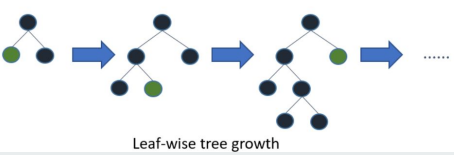

### <font color='red'>Coding Example<font>

#### <font color='white'>Classification<font>

In [ ]:
#Resource: https://www.kaggle.com/raghupalem/bill_authentication
!gdown 1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j

Downloading...
From: https://drive.google.com/uc?id=1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j
To: /content/bill_authentication.csv
100% 46.4k/46.4k [00:00<00:00, 53.8MB/s]


In [ ]:
data = pd.read_csv('bill_authentication.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[154   0]
 [  1 120]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       154
           1       1.00      0.99      1.00       121

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### <font color='white'>Regression<font>

In [ ]:
#Resource: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
!gdown 1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H

Downloading...
From: https://drive.google.com/uc?id=1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H
To: /content/train.csv
100% 461k/461k [00:00<00:00, 104MB/s]


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,Y_train)

y_pred = LGBM.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, Y_test)))

Mean Absolute Error: 17876.76428987569


## <font color='pink'>Cat Boost<font>

CatBoost uses MVS(Minimal Variance Sampling). It grows balanced trees.
CatBoost can handle categorical feature values, as they are transformed to numeric values using the formula below.


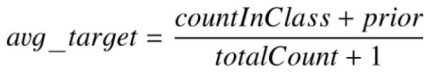

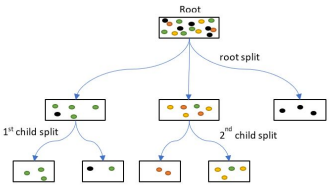

### <font color='red'>Coding Example<font>

#### <font color='white'>Classification<font>

In [ ]:
#Resource: https://www.kaggle.com/raghupalem/bill_authentication
!gdown 1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j

Downloading...
From: https://drive.google.com/uc?id=1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j
To: /content/bill_authentication.csv
100% 46.4k/46.4k [00:00<00:00, 53.2MB/s]


In [ ]:
data = pd.read_csv('bill_authentication.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Note: The ROC curve shows the model’s ability to distinguishing between classes. AUC is the Area Under the ROC Curve.
from catboost import CatBoostClassifier
from random import seed

cb_model= CatBoostClassifier(loss_function='Logloss',eval_metric='AUC',verbose=200,random_seed=seed(1))
cb_model.fit(X_train,Y_train)

Learning rate set to 0.010718
0:	total: 2.69ms	remaining: 2.69s
200:	total: 454ms	remaining: 1.8s
400:	total: 836ms	remaining: 1.25s
600:	total: 1.51s	remaining: 1000ms
800:	total: 1.89s	remaining: 469ms
999:	total: 2.27s	remaining: 0us


In [ ]:
y_pred = cb_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[142   1]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.99      1.00      1.00       132

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### <font color='white'>Regression<font>

In [ ]:
#Resource: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
!gdown 1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H

Downloading...
From: https://drive.google.com/uc?id=1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H
To: /content/train.csv
100% 461k/461k [00:00<00:00, 93.7MB/s]


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
#Note: Do we need to change seed?
#Note: metric_period
from catboost import CatBoostRegressor


cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed=42,
                             bagging_temperature=0.2,
                             od_type='Iter',
                             metric_period=50,
                             od_wait=20)

cb_model.fit(X_train, Y_train)

0:	learn: 78432.0114339	total: 49.1ms	remaining: 24.5s
50:	learn: 27091.9399963	total: 2.18s	remaining: 19.2s
100:	learn: 17154.8988858	total: 4.28s	remaining: 16.9s
150:	learn: 13229.2364896	total: 6.28s	remaining: 14.5s
200:	learn: 10959.0072134	total: 8.31s	remaining: 12.4s
250:	learn: 8905.3678780	total: 10.4s	remaining: 10.3s
300:	learn: 7270.4139250	total: 12.5s	remaining: 8.24s
350:	learn: 5931.6308905	total: 14.6s	remaining: 6.18s
400:	learn: 4981.7909023	total: 16.6s	remaining: 4.1s
450:	learn: 4064.2007123	total: 18.7s	remaining: 2.03s
499:	learn: 3368.0317417	total: 20.8s	remaining: 0us


In [ ]:
y_pred = cb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))

Mean Absolute Error : 16896.322994737446


## <font color='green'>Comparison: CatBoost vs XGBoost vs LGBM<font>

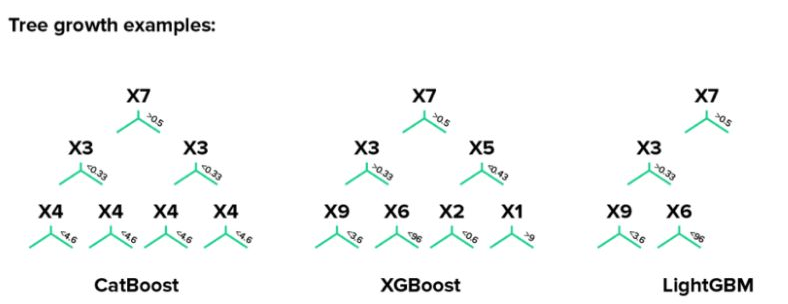

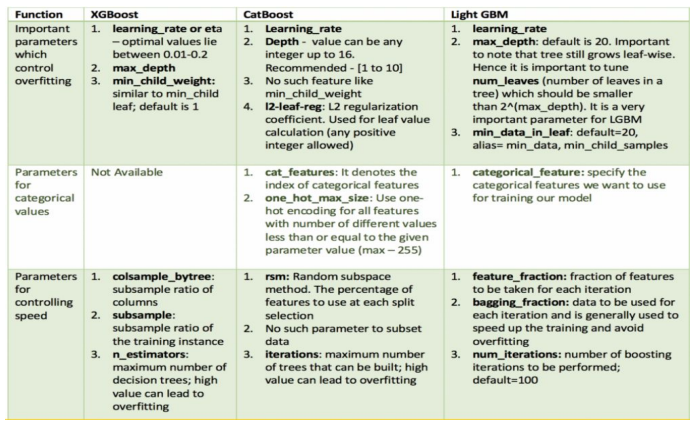

## <font color='orange'>Naive Bayes<font>

Naive Bayes is based on the Bayesian formula given below.

1. Calculate the prior probability for given
class labels
2. Find Likelihood probability with each
attribute for each class
3. Put these value in Bayes Formula and
calculate posterior probability.
4. See which class has a higher probability,
given the input belongs to the higher
probability class

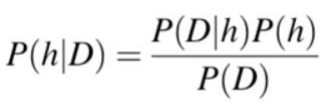

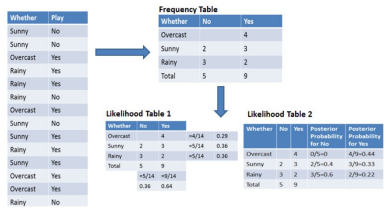

### <font color='red'>Coding Example<font>

#### <font color='white'>Classification<font>

In [ ]:
#Resource: https://www.kaggle.com/raghupalem/bill_authentication
!gdown 1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j

Downloading...
From: https://drive.google.com/uc?id=1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j
To: /content/bill_authentication.csv
100% 46.4k/46.4k [00:00<00:00, 52.7MB/s]


In [ ]:
data = pd.read_csv('bill_authentication.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[141  13]
 [ 27  94]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       154
           1       0.88      0.78      0.82       121

    accuracy                           0.85       275
   macro avg       0.86      0.85      0.85       275
weighted avg       0.86      0.85      0.85       275

